In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.shape

(891, 12)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
# Check the number of survivors and the dead
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

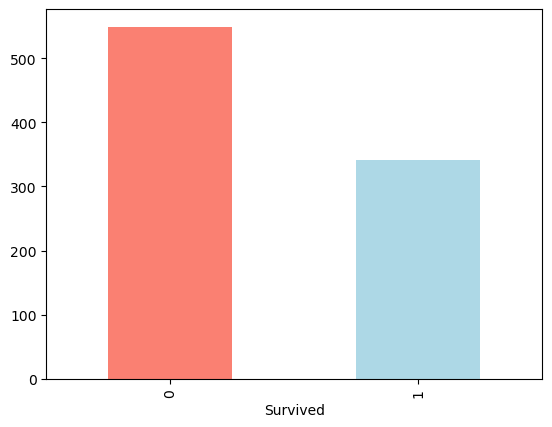

In [8]:
df["Survived"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [9]:
# Compare Survived column with Age column
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


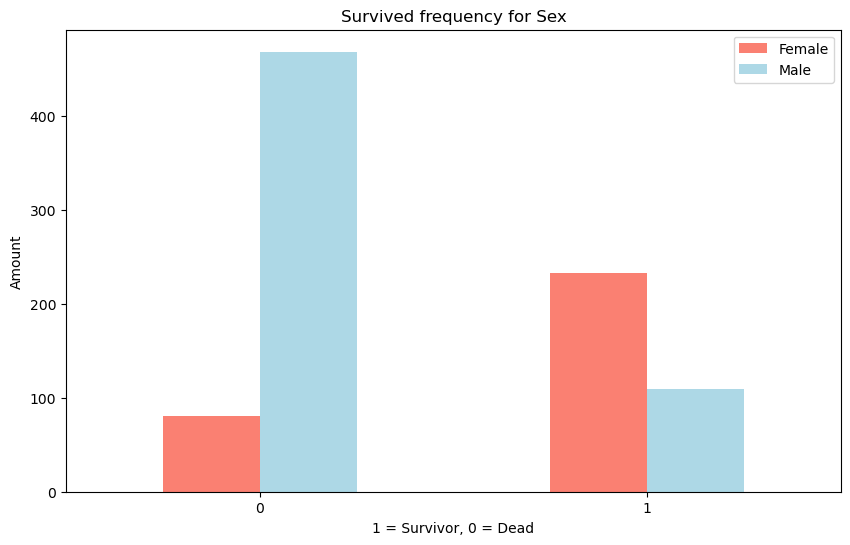

In [27]:
# Survived frequency for age 
pd.crosstab(df.Survived, df.Sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Survived frequency for Sex")
plt.xlabel("1 = Survivor, 0 = Dead")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

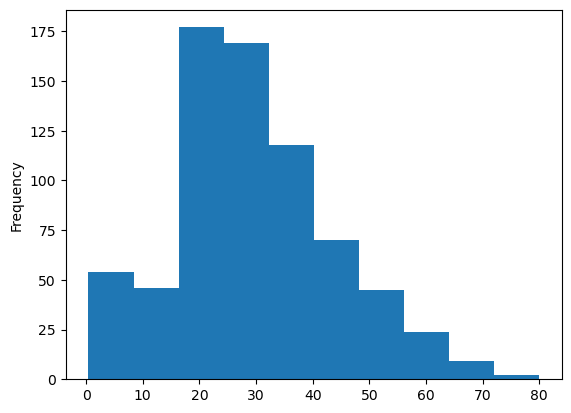

In [11]:
# Check the distribution of the age column with a histogram
df.Age.plot.hist();

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df["Age"].dtype

dtype('float64')

In [3]:
# Fill missing values for Age with the median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill missing fare with the median fare
df["Fare"] = df['Fare'].fillna(df['Fare'].median())

# Fill missing embarked with the most common value
df["Embarked"] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Calculate the most frequent (mode) value
mode_value = df["Cabin"].mode()

# Check if mode_value is empty
if not mode_value.empty:
    # Fill missing Cabin values with the most frequent value
    df["Cabin"] = df["Cabin"].fillna(mode_value[0])
else:
    # If mode is not available, you can choose to fill with a placeholder or leave as is
    df["Cabin"] = df["Cabin"].fillna("Unknown")


In [4]:
# Convert 'Sex' into numeric values
df["Sex"] = df["Sex"].map({'male': 1, "female":0})

# Convert 'Embarked' into numeric values
df["Embarked"] = df["Embarked"].map({'S': 0, 'C': 1, 'Q': 2})

In [39]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,0


In [5]:
# Extract titles using regex
df['Extracted_Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
print(df[['Name', 'Extracted_Title']])

# Perform One-Hot Encoding for Extracted_Title
df = pd.get_dummies(df, columns=['Extracted_Title'], prefix='Title')


                                                  Name Extracted_Title
0                              Braund, Mr. Owen Harris              Mr
1    Cumings, Mrs. John Bradley (Florence Briggs Th...             Mrs
2                               Heikkinen, Miss. Laina            Miss
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)             Mrs
4                             Allen, Mr. William Henry              Mr
..                                                 ...             ...
886                              Montvila, Rev. Juozas             Rev
887                       Graham, Miss. Margaret Edith            Miss
888           Johnston, Miss. Catherine Helen "Carrie"            Miss
889                              Behr, Mr. Karl Howell              Mr
890                                Dooley, Mr. Patrick              Mr

[891 rows x 2 columns]


In [6]:
# Extract prefix before first space, fill NaN with 'NoPrefix'
df['Ticket_Prefix'] = df['Ticket'].str.extract(r'([A-Za-z./]+)', expand=False).fillna('NoPrefix')

# Compute ticket length
df['Ticket_Length'] = df['Ticket'].apply(len)

# Categorize tickets as numeric or alphanumeric
df['Is_Numeric_Ticket'] = df['Ticket'].apply(lambda x: x.isdigit())

# One-hot encode the Ticket_Prefix
df = pd.get_dummies(df, columns=['Ticket_Prefix'], prefix='Prefix')

df = df.drop("Ticket", axis=1)

In [7]:
# Extract the first letter (deck) from the cabin column
df['Cabin_Deck'] = df['Cabin'].str[0]

# Count how many cabins are in each entry (based on space separation)
df['Cabin_Count'] = df['Cabin'].apply(lambda x: len(x.split()))

# Fill missing values with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Check if the cabin is shared (more than one cabin listed)
df['Is_Shared_Cabin'] = df['Cabin'].apply(lambda x: 1 if ' ' in x else 0)

# One-hot encode the Cabin_Deck
df = pd.get_dummies(df, columns=['Cabin_Deck'], prefix='Deck')

df = df.drop("Cabin", axis=1)

In [7]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [8]:
df = df.drop("Name", axis=1)
df.T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Sex,1,0,0,0,1,1,1,1,0,0,...,1,0,1,1,0,1,0,0,1,1
Age,22.0,38.0,26.0,35.0,35.0,28.0,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,28.0,26.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Deck_D,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Deck_E,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Deck_F,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Deck_G,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df["Cabin"].head(10)

0    B96 B98
1        C85
2    B96 B98
3       C123
4    B96 B98
5    B96 B98
6        E46
7    B96 B98
8    B96 B98
9    B96 B98
Name: Cabin, dtype: object

In [11]:
# Split data into X and y
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [ ]:
X.head()

In [ ]:
y.head()

In [12]:
# Split data into train and test
np.random.seed(42)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.head()

In [47]:
# Import the model 
model = LogisticRegression()

In [48]:
model.fit(X_train, y_train)

C:\Users\musliu\Desktop\titanic\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
# Predict on the test set
y_pred = model.predict(X_test)

In [50]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.7988826815642458


### Hyperparameter tuning with RandomizedSearchCV

In [51]:
# Create a hyperparameter grid for LogisticRegression
param_grid = {
    # 'C': [0.01, 0.1, 1, 10],
    "C": np.logspace(-4., 4., num=20),
    'solver': ['liblinear', 'lbfgs'],
}

In [52]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
random_search = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=param_grid,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True,
                                  n_jobs=-1)

# Fit random hyperparameter search for logisticRegression
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'lbfgs']},
                   verbose=True)

In [53]:
random_search.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [54]:
random_search.score(X_test, y_test)

0.7932960893854749

### Hyerparameter Tuning with GridSearchCV

In [55]:
# Different hyperparameter for LogisticRegression model
param_grid = {"C": np.logspace(-4., 4., 30),
                "solver": ["liblinear"]}

# Search grid hyperparameter search for LOgisticRegression
grid_search = GridSearchCV(LogisticRegression(),
                          param_grid=param_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
grid_search.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [56]:
# Check the best hyperparameters
grid_search.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [57]:
# Evaluate the grid search LogisticRegression model
grid_search.score(X_test, y_test)

0.7877094972067039

### Make Prediction on Test Data

In [79]:
# Import the test data
df_test = pd.read_csv("test.csv")

df_test.shape

(418, 11)

In [76]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Preprocessing the data (getting the test data in thesame format as our training dataset)

In [80]:
def preprocess_data(df):
    """
    Performs transformations on df and return transormed df.
    """
    # Fill missing values for Age with the median
    df["Age"] = df["Age"].fillna(df["Age"].median())
    # Fill missing fare with the median fare
    df["Fare"] = df['Fare'].fillna(df['Fare'].median())
    # Fill missing embarked with the most common value
    df["Embarked"] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    # Calculate the most frequent (mode) value
    mode_value = df["Cabin"].mode()
    # Check if mode_value is empty
    if not mode_value.empty:
        # Fill missing Cabin values with the most frequent value
        df["Cabin"] = df["Cabin"].fillna(mode_value[0])
    else:
        # If mode is not available, you can choose to fill with a placeholder or leave as is
        df["Cabin"] = df["Cabin"].fillna("Unknown")

    
    # Convert 'Sex' into numeric values
    df["Sex"] = df["Sex"].map({'male': 1, "female":0})
    # Convert 'Embarked' into numeric values
    df["Embarked"] = df["Embarked"].map({'S': 0, 'C': 1, 'Q': 2})

    
    # Extract titles using regex
    df['Extracted_Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
    print(df[['Name', 'Extracted_Title']])
    # Perform One-Hot Encoding for Extracted_Title
    df = pd.get_dummies(df, columns=['Extracted_Title'], prefix='Title')
    

    # Extract prefix before first space, fill NaN with 'NoPrefix'
    df['Ticket_Prefix'] = df['Ticket'].str.extract(r'([A-Za-z./]+)', expand=False).fillna('NoPrefix')
    # Compute ticket length
    df['Ticket_Length'] = df['Ticket'].apply(len)
    # Categorize tickets as numeric or alphanumeric
    df['Is_Numeric_Ticket'] = df['Ticket'].apply(lambda x: x.isdigit())
    # One-hot encode the Ticket_Prefix
    df = pd.get_dummies(df, columns=['Ticket_Prefix'], prefix='Prefix')
    df = df.drop("Ticket", axis=1)
    

    # Extract the first letter (deck) from the cabin column
    df['Cabin_Deck'] = df['Cabin'].str[0]
    # Count how many cabins are in each entry (based on space separation)
    df['Cabin_Count'] = df['Cabin'].apply(lambda x: len(x.split()))
    # Fill missing values with 'Unknown'
    df['Cabin'] = df['Cabin'].fillna('Unknown')
    # Check if the cabin is shared (more than one cabin listed)
    df['Is_Shared_Cabin'] = df['Cabin'].apply(lambda x: 1 if ' ' in x else 0)
    # One-hot encode the Cabin_Deck
    df = pd.get_dummies(df, columns=['Cabin_Deck'], prefix='Deck')
    df = df.drop("Cabin", axis=1)
    

    df = df.drop("Name", axis=1)

    return df

In [81]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

                                             Name Extracted_Title
0                                Kelly, Mr. James              Mr
1                Wilkes, Mrs. James (Ellen Needs)             Mrs
2                       Myles, Mr. Thomas Francis              Mr
3                                Wirz, Mr. Albert              Mr
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)             Mrs
..                                            ...             ...
413                            Spector, Mr. Woolf              Mr
414                  Oliva y Ocana, Dona. Fermina            Dona
415                  Saether, Mr. Simon Sivertsen              Mr
416                           Ware, Mr. Frederick              Mr
417                      Peter, Master. Michael J          Master

[418 rows x 2 columns]


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Col,Title_Dona,...,Prefix_W.E.P.,Cabin_Count,Is_Shared_Cabin,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G
0,892,3,1,34.5,0,0,7.8292,2,False,False,...,False,4,1,False,True,False,False,False,False,False
1,893,3,0,47.0,1,0,7.0000,0,False,False,...,False,4,1,False,True,False,False,False,False,False
2,894,2,1,62.0,0,0,9.6875,2,False,False,...,False,4,1,False,True,False,False,False,False,False
3,895,3,1,27.0,0,0,8.6625,0,False,False,...,False,4,1,False,True,False,False,False,False,False
4,896,3,0,22.0,1,1,12.2875,0,False,False,...,False,4,1,False,True,False,False,False,False,False


In [83]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'Deck_T',
 'Prefix_A',
 'Prefix_A/S',
 'Prefix_C.A./SOTON',
 'Prefix_Fa',
 'Prefix_LINE',
 'Prefix_P/PP',
 'Prefix_S.C./A.',
 'Prefix_S.O.P.',
 'Prefix_S.P.',
 'Prefix_S.W./PP',
 'Prefix_SCO/W',
 'Prefix_SO/C',
 'Prefix_SW/PP',
 'Prefix_W/C',
 'Prefix_WE/P',
 'Title_Capt',
 'Title_Don',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Mlle',
 'Title_Mme',
 'Title_Sir',
 'Title_the Countess'}

In [85]:
# Print the columns in the DataFrame
print(df_test.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title_Col', 'Title_Dona', 'Title_Dr', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev',
       'Ticket_Length', 'Is_Numeric_Ticket', 'Prefix_A.', 'Prefix_A./',
       'Prefix_A/', 'Prefix_AQ/', 'Prefix_C', 'Prefix_C.A.', 'Prefix_CA',
       'Prefix_CA.', 'Prefix_F.C.', 'Prefix_F.C.C.', 'Prefix_LP',
       'Prefix_NoPrefix', 'Prefix_PC', 'Prefix_PP', 'Prefix_S.C./PARIS',
       'Prefix_S.O./P.P.', 'Prefix_S.O.C.', 'Prefix_SC', 'Prefix_SC/A',
       'Prefix_SC/A.', 'Prefix_SC/AH', 'Prefix_SC/PARIS', 'Prefix_SC/Paris',
       'Prefix_SOTON/O', 'Prefix_SOTON/O.Q.', 'Prefix_SOTON/OQ',
       'Prefix_STON/O', 'Prefix_STON/OQ.', 'Prefix_W./C.', 'Prefix_W.E.P.',
       'Cabin_Count', 'Is_Shared_Cabin', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G'],
      dtype='object')


In [87]:
# Clean up column names by stripping any leading/trailing spaces
df_test.columns = df_test.columns.str.strip()

In [89]:
# df_test = pd.get_dummies(df_test, columns=['Title', 'Prefix'], prefix=['Title', 'Prefix'])

# Now check if the specific columns (e.g., 'Title_Capt', 'Prefix_A') exist
# print(df_test.columns)

In [90]:
# Ensure that all expected columns are present
expected_columns = ['Title_Capt', 'Title_Don', 'Title_Jonkheer', 'Title_Lady', 
                    'Title_Major', 'Title_Mlle', 'Title_Mme', 'Title_Sir', 
                    'Title_the Countess', 'Prefix_A', 'Prefix_A/S', 
                    'Prefix_C.A./SOTON', 'Prefix_Fa', 'Prefix_LINE', 
                    'Prefix_P/PP', 'Prefix_S.C./A.', 'Prefix_S.O.P.', 
                    'Prefix_S.P.', 'Prefix_S.W./PP', 'Prefix_SCO/W', 
                    'Prefix_SO/C', 'Prefix_SW/PP', 'Prefix_W/C', 
                    'Prefix_WE/P', 'Deck_T']

for col in expected_columns:
    if col not in df_test.columns:
        df_test[col] = 0  # Add missing columns with default values (e.g., zeros)

In [91]:
# Reorder df_test columns to match the order of X_train columns
df_test = df_test[X_train.columns]

In [93]:
# Make predictions on updated test data
test_preds = model.predict(df_test)

In [94]:
test_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [95]:
# Format prediction into thesame format Kaggle is after 
df_preds = pd.DataFrame()
df_preds["PassengerId"] = df_test["PassengerId"]
df_preds["Survived"] = test_preds
df_preds

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [97]:
# Export prediction data 
df_preds.to_csv("test_predictions.csv", index=False)

## Feature Importance

In [99]:
scaler = StandardScaler()

# Get the coefficients (feature importance)
coefficients = model.coef_[0]

# Create a DataFrame to display feature importance alongside feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(coefficients)  # Taking the absolute value of coefficients
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

            Feature  Importance
19         Title_Mr    1.523789
20        Title_Mrs    1.317225
2               Sex    1.036143
15     Title_Master    0.753554
41  Prefix_NoPrefix    0.594201
..              ...         ...
23        Title_Sir    0.000000
57      Prefix_SO/C    0.000000
12   Title_Jonkheer    0.000000
10        Title_Don    0.000000
50      Prefix_S.P.    0.000000

[77 rows x 2 columns]


In [100]:
len(feature_importance_df)

77

C:\Users\musliu\AppData\Local\Temp\ipykernel_13344\4135147063.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, dodge=False, ci=None, edgecolor='black')


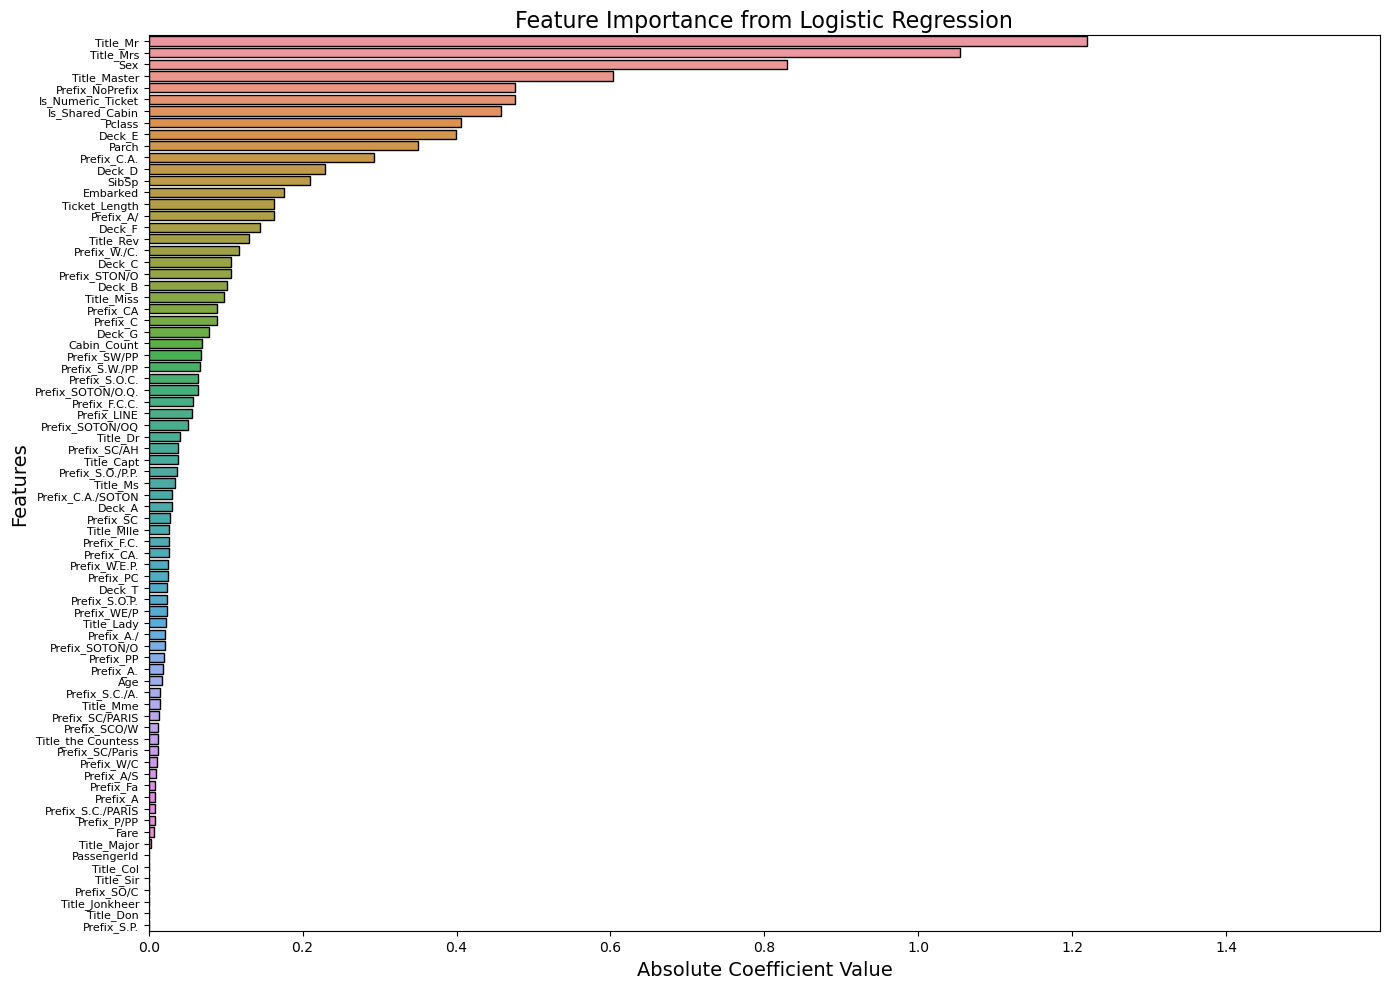

In [129]:
# Plot the feature importance using Seaborn and Matplotlib
plt.figure(figsize=(14, 10))  # Further increased figure size for longer feature names

# Increase the bar width and spacing between bars by adding 'dodge=False' and adjusting the bar width
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, dodge=False, ci=None, edgecolor='black')

# Customize the title and axis labels
plt.title('Feature Importance from Logistic Regression', fontsize=16)
plt.xlabel('Absolute Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Rotate y-axis labels for better readability
plt.yticks(fontsize=8, rotation=0)  # No rotation, straight labels

# Increase spacing between bars by adjusting bar width (spacing between categories)
for patch in plt.gca().patches:
    patch.set_width(patch.get_width() * 0.8)  # Reduce the bar width to add space

plt.tight_layout()  # Adjust spacing

# Show the plot
plt.show()